# Práctica de Machine Learning
**Autor:** Francisco Javier Luque Escobosa 

En esta práctica vamos a abordar un problema de Machine Learning realista usando un dataset de Airbnb.


In [85]:
import numpy  as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Carga de datos  y división Train/Test

Empezamos cargando el conjunto de datos y realizamos una exploración inicial viendo cuántas columnas y filas tiene.


In [86]:
data = pd.read_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract.csv', decimal = ".", sep = ";")

print(data.shape)
data.head()

(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Ahora si preparamos los datos, comenzamos con la división Train y Test.


Usaremos "train_test_split" para dividir el conjunto de datos en 80% Train y 20% Test

In [114]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract.csv', decimal = ".", sep = ";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

#Guardamos
train.to_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract_train.csv', decimal = ".", sep = ";", index=False)
test.to_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract_test.csv', decimal = ".", sep = ";", index=False)

#A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él.
airbnb_data = pd.read_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract_train.csv', decimal = ".", sep = ";")

airbnb_data.head(5)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


## Análisis exploratorio y limpieza

Vamos a ver como se encuentran los datos

In [88]:
airbnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [89]:
print(airbnb_data.dtypes)

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


In [90]:
print(airbnb_data.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Según las **columnas** del dataset y el objetivo de nuestra práctica, voy a empezar la limpieza quedandome con las que creo que son mas **relevantes**

In [115]:
columnas_relevantes = [
    'Accommodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Guests Included',
    'Extra People',
    'Amenities',
    'Minimum Nights',
    'Maximum Nights',
    'Number of Reviews',
    'Cleaning Fee',
    'Review Scores Value',
    'Cancellation Policy',
    'Latitude',
    'Longitude',
    'Price'
]

airbnb_data = airbnb_data[columnas_relevantes]

airbnb_data.head(10)

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Cleaning Fee,Review Scores Value,Cancellation Policy,Latitude,Longitude,Price
0,4,1.0,1.0,2.0,1,0,"TV,Internet,Wireless Internet,Air conditioning...",2,1125,12,25.0,9.0,moderate,40.407732,-3.684819,60.0
1,4,1.0,1.0,2.0,1,0,"TV,Internet,Wireless Internet,Air conditioning...",1,1125,20,15.0,10.0,flexible,40.415802,-3.705340,50.0
2,1,1.5,1.0,8.0,1,0,"Internet,Wireless Internet,Wheelchair accessib...",3,30,0,5.0,NaN,moderate,40.389048,-3.740374,10.0
3,2,3.0,1.0,1.0,1,0,"Wireless Internet,Kitchen,Smoking allowed,Heat...",10,1125,0,NaN,NaN,strict,40.412814,-3.703052,30.0
4,2,1.0,1.0,1.0,1,10,"TV,Cable TV,Internet,Wireless Internet,Air con...",1,1125,97,NaN,9.0,strict,40.438631,-3.713716,32.0
5,1,1.0,1.0,1.0,1,0,"TV,Internet,Wireless Internet,Wheelchair acces...",2,60,43,NaN,10.0,strict,40.411880,-3.702481,35.0
6,4,1.0,1.0,2.0,2,21,"TV,Cable TV,Internet,Wireless Internet,Air con...",1,3,24,18.0,10.0,flexible,40.415087,-3.710994,80.0
7,2,3.0,1.0,1.0,1,5,"Wireless Internet,Kitchen,Smoking allowed,Elev...",10,1125,0,14.0,NaN,strict,40.418266,-3.705617,25.0
8,4,1.0,1.0,2.0,3,10,"TV,Internet,Wireless Internet,Air conditioning...",4,36,1,45.0,10.0,strict,39.539871,2.592716,69.0
9,4,2.0,2.0,3.0,2,20,"TV,Cable TV,Internet,Wireless Internet,Air con...",7,180,3,160.0,9.0,strict,40.426410,-3.673278,158.0


In [92]:
print(airbnb_data.columns)

Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included',
       'Extra People', 'Amenities', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Cleaning Fee', 'Review Scores Value',
       'Cancellation Policy', 'Latitude', 'Longitude', 'Price'],
      dtype='object')


Ahora vamos a transformar la columna **'Amenities'** contando cada elemento que contiene para que tenga un valor numérico

In [93]:
airbnb_data["Amenities_Count"] = airbnb_data['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

print(airbnb_data[["Amenities", "Amenities_Count"]])

                                               Amenities  Amenities_Count
0      TV,Internet,Wireless Internet,Air conditioning...               13
1      TV,Internet,Wireless Internet,Air conditioning...               18
2      Internet,Wireless Internet,Wheelchair accessib...               25
3      Wireless Internet,Kitchen,Smoking allowed,Heat...                5
4      TV,Cable TV,Internet,Wireless Internet,Air con...               15
...                                                  ...              ...
11819  TV,Internet,Wireless Internet,Kitchen,Breakfas...               17
11820  TV,Internet,Wireless Internet,Air conditioning...               13
11821  TV,Internet,Wireless Internet,Air conditioning...               18
11822  TV,Cable TV,Wireless Internet,Kitchen,Buzzer/w...               19
11823  TV,Internet,Wireless Internet,Kitchen,Doorman,...               15

[11824 rows x 2 columns]


In [94]:
airbnb_data = airbnb_data.drop(['Amenities'], axis=1, errors='ignore')
airbnb_data.head()


,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cleaning Fee,Review Scores Value,Cancellation Policy,Latitude,Longitude,Price,Amenities_Count
0,4,1.0,1.0,2.0,1,0,2,1125,12,25.0,9.0,moderate,40.407732,-3.684819,60.0,13
1,4,1.0,1.0,2.0,1,0,1,1125,20,15.0,10.0,flexible,40.415802,-3.705340,50.0,18
2,1,1.5,1.0,8.0,1,0,3,30,0,5.0,NaN,moderate,40.389048,-3.740374,10.0,25
3,2,3.0,1.0,1.0,1,0,10,1125,0,NaN,NaN,strict,40.412814,-3.703052,30.0,5
4,2,1.0,1.0,1.0,1,10,1,1125,97,NaN,9.0,strict,40.438631,-3.713716,32.0,15


Vamos ahora a tratar los **nulos** que existen en el dataset para reducirlos lo máximo posible y evitar errores

In [95]:
print(airbnb_data.isnull().any())


Accommodates           False
Bathrooms               True
Bedrooms                True
Beds                    True
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Number of Reviews      False
Cleaning Fee            True
Review Scores Value     True
Cancellation Policy    False
Latitude               False
Longitude              False
Price                   True
Amenities_Count        False
dtype: bool


Veamos que porcentaje de **nulos** tenemos en cada campo

In [96]:
null_percent = airbnb_data.isnull().mean() * 100

print(null_percent)

Accommodates            0.000000
Bathrooms               0.372124
Bedrooms                0.169147
Beds                    0.312923
Guests Included         0.000000
Extra People            0.000000
Minimum Nights          0.000000
Maximum Nights          0.000000
Number of Reviews       0.000000
Cleaning Fee           41.018268
Review Scores Value    22.767253
Cancellation Policy     0.000000
Latitude                0.000000
Longitude               0.000000
Price                   0.126861
Amenities_Count         0.000000
dtype: float64


Vamos a comenzar rellenando los **valores nulos** por los que considero que pueden encajar usando la **moda**

Sustituimos los NAN de "Bathrooms", "Bedrooms", "Review Scores Value" y "Beds" usando un **bucle for**.

In [97]:
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data[column].mode()[0]
    airbnb_data[column].fillna(mode_value, inplace=True)
    
airbnb_data.head()

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cleaning Fee,Review Scores Value,Cancellation Policy,Latitude,Longitude,Price,Amenities_Count
0,4,1.0,1.0,2.0,1,0,2,1125,12,25.0,9.0,moderate,40.407732,-3.684819,60.0,13
1,4,1.0,1.0,2.0,1,0,1,1125,20,15.0,10.0,flexible,40.415802,-3.705340,50.0,18
2,1,1.5,1.0,8.0,1,0,3,30,0,5.0,10.0,moderate,40.389048,-3.740374,10.0,25
3,2,3.0,1.0,1.0,1,0,10,1125,0,NaN,10.0,strict,40.412814,-3.703052,30.0,5
4,2,1.0,1.0,1.0,1,10,1,1125,97,NaN,9.0,strict,40.438631,-3.713716,32.0,15


Ahora vamos a ocuparnos de **'Cleaning fee'**.

Como hemos visto tiene un porcentaje del **41%** de valores nulos, me parece un problema ya que este campo me parece relevante para determinar el precio.


La solución que he pensado es que para que no interfiera demasiado, los valores a **0** y **NAN**, sean contabilizados como **0**.
Por otro lado, los que tengan un precio **mayor a cero** seran contados como **1**, asi separaremos los que tienen que pagar tarifa de los que no.

In [98]:
airbnb_data['Has_Cleaning_Fee'] = airbnb_data['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

airbnb_data['Cleaning_Fee_Amount'] = airbnb_data['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)

airbnb_data = airbnb_data.drop(['Cleaning Fee'], axis=1)

print(airbnb_data[['Has_Cleaning_Fee', 'Cleaning_Fee_Amount']].head())

   Has_Cleaning_Fee  Cleaning_Fee_Amount
0                 1                 25.0
1                 1                 15.0
2                 1                  5.0
3                 0                  0.0
4                 0                  0.0


Me quedan los nulos de la columna **'Precio'**, como vimos que el porcentaje era muy pequeño vamos a **eliminar directamente** las filas que no tienen precio ya que no nos interesa si es lo que queremos predecir en un futuro.

In [99]:
airbnb_data = airbnb_data.dropna(subset=['Price'])

print(airbnb_data[['Price']].head())

   Price
0   60.0
1   50.0
2   10.0
3   30.0
4   32.0


Ahora podemos comprobar que efectivamente **hemos solucionado** el problema con **los nulos** de nuestro dataset.

In [100]:
print(airbnb_data.isnull().any())

Accommodates           False
Bathrooms              False
Bedrooms               False
Beds                   False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Number of Reviews      False
Review Scores Value    False
Cancellation Policy    False
Latitude               False
Longitude              False
Price                  False
Amenities_Count        False
Has_Cleaning_Fee       False
Cleaning_Fee_Amount    False
dtype: bool


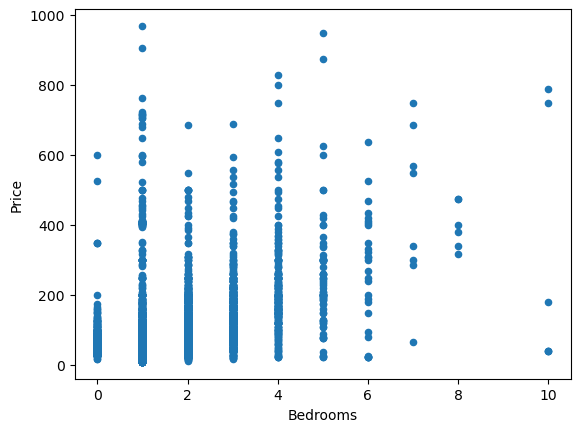

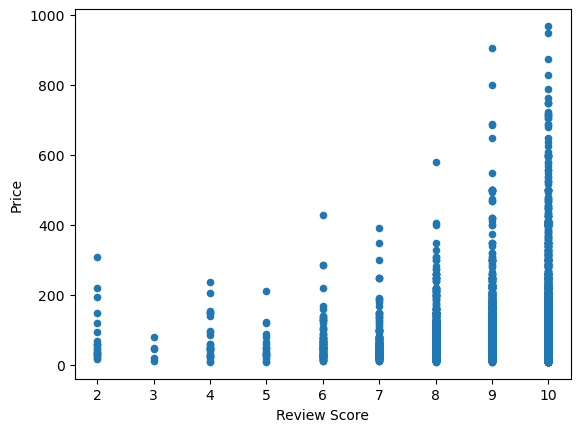

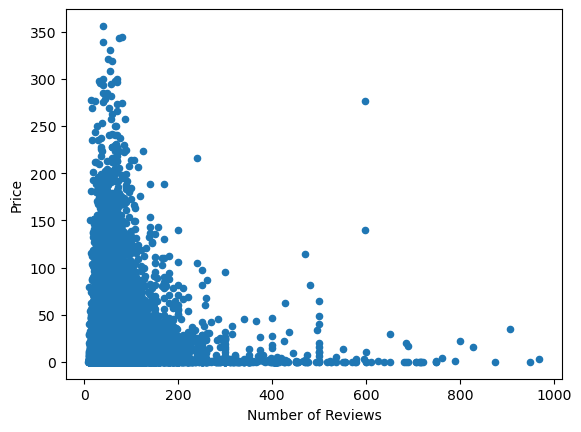

In [101]:
airbnb_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


airbnb_data.plot(kind = 'scatter',x='Review Scores Value',y = 'Price')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.show()


airbnb_data.plot(kind = 'scatter',x='Price',y = 'Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

Como parte del **análisis exploratorio** me gusta siempre que tenemos la latitud y longitud poder representar en un mapa cuales son las **zonas con el precio** donde podemos ver que es **más caro**.

In [102]:
!pip install plotly.express

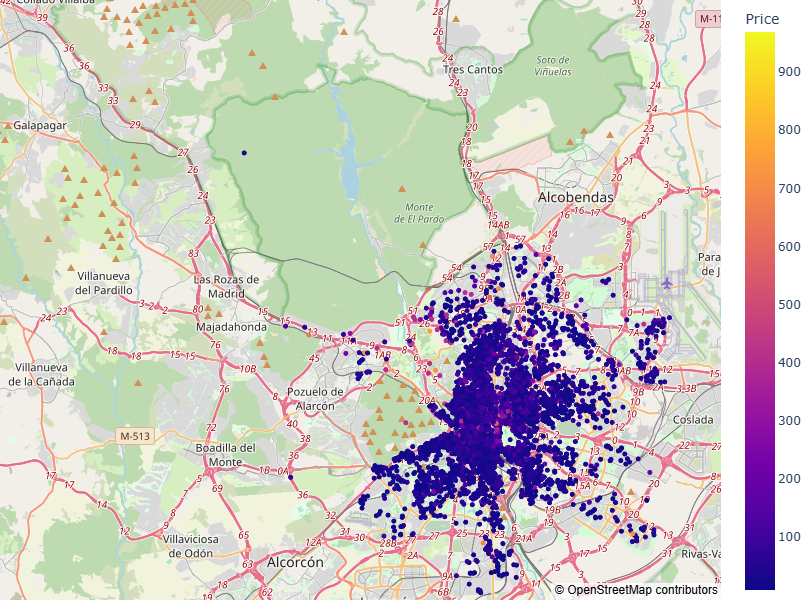

In [103]:
import plotly.express as px

fig = px.scatter_mapbox(
    airbnb_data,
    lat="Latitude",
    lon="Longitude",
    color="Price",
    size_max=5,
    zoom=10,
    height=600,
    hover_data=["Price", "Bedrooms", "Review Scores Value"]
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Tenemos la columna **'Cancellation Policy'** con variables categoricas, por lo que vamos a usar OneHotEncoder.

Vamos a dividir las variables en varias columnas  para que nos indiquen cual de las politicas de cancelación es la que tienen.

In [104]:
from sklearn.preprocessing import OneHotEncoder

# Imputar NaN
airbnb_data['Cancellation Policy'] = airbnb_data['Cancellation Policy'].fillna('Desconocido')

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_values = encoder.fit_transform(airbnb_data[['Cancellation Policy']])

# Creo el DataFrame con el mismo índice
encoded_df = pd.DataFrame(encoded_values, 
                          columns=encoder.get_feature_names_out(['Cancellation Policy']),
                          index=airbnb_data.index)

# Concatena y elimina columna original
airbnb_data = pd.concat([airbnb_data, encoded_df], axis=1)
airbnb_data = airbnb_data.drop('Cancellation Policy', axis=1)

print(airbnb_data.head())

   Accommodates  Bathrooms  Bedrooms  Beds  Guests Included  Extra People  \
0             4        1.0       1.0   2.0                1             0   
1             4        1.0       1.0   2.0                1             0   
2             1        1.5       1.0   8.0                1             0   
3             2        3.0       1.0   1.0                1             0   
4             2        1.0       1.0   1.0                1            10   

   Minimum Nights  Maximum Nights  Number of Reviews  Review Scores Value  \
0               2            1125                 12                  9.0   
1               1            1125                 20                 10.0   
2               3              30                  0                 10.0   
3              10            1125                  0                 10.0   
4               1            1125                 97                  9.0   

   ...  Has_Cleaning_Fee  Cleaning_Fee_Amount  Cancellation Policy_flexibl

In [105]:
airbnb_data.head()

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Value,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,4,1.0,1.0,2.0,1,0,2,1125,12,9.0,...,1,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4,1.0,1.0,2.0,1,0,1,1125,20,10.0,...,1,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.5,1.0,8.0,1,0,3,30,0,10.0,...,1,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,3.0,1.0,1.0,1,0,10,1125,0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,1.0,1.0,1.0,1,10,1,1125,97,9.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Ahora vamos a ver la **correlación** que existe entre las variables.
De esta forma vamos a ver la **fuerza** y **dirección** de la relación lineal entre ellas.

In [106]:
airbnb_data.corr() # matriz de correlación

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Value,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
Accommodates,1.000000,0.428245,0.721047,0.835636,0.565060,0.251381,0.006699,0.001253,0.058080,-0.079501,...,0.194892,0.343448,-0.223678,0.016438,-0.003979,0.001117,0.210675,0.001443,0.027109,0.034604
Bathrooms,0.428245,1.000000,0.516660,0.470689,0.240117,0.083515,0.030449,-0.003016,-0.075873,0.029193,...,0.007643,0.197506,-0.092458,0.016744,-0.098517,-0.010176,0.172978,0.006417,0.014199,0.049085
Bedrooms,0.721047,0.516660,1.000000,0.725291,0.435339,0.132868,0.020766,0.000301,-0.046640,-0.006075,...,0.089726,0.299375,-0.096247,0.007240,-0.049744,-0.007606,0.132606,0.006983,0.010378,0.043401
Beds,0.835636,0.470689,0.725291,1.000000,0.456701,0.186302,0.007440,0.001254,0.017819,-0.056661,...,0.096846,0.266358,-0.150797,0.010171,-0.023341,0.001638,0.161518,0.003851,0.003128,0.029043
Guests Included,0.565060,0.240117,0.435339,0.456701,1.000000,0.358659,0.003170,-0.004526,0.100297,-0.039288,...,0.225805,0.261092,-0.187230,0.016500,0.026317,-0.006493,0.152524,-0.009360,0.013807,0.013150
Extra People,0.251381,0.083515,0.132868,0.186302,0.358659,1.000000,-0.019904,-0.003589,0.077969,-0.026368,...,0.202798,0.176034,-0.160879,0.012527,0.036607,0.014580,0.104018,-0.008551,0.166008,0.018131
Minimum Nights,0.006699,0.030449,0.020766,0.007440,0.003170,-0.019904,1.000000,-0.001074,-0.037638,-0.002976,...,0.016569,0.076430,-0.027004,-0.002173,-0.014244,0.000002,0.039992,-0.002418,-0.005631,-0.001770
Maximum Nights,0.001253,-0.003016,0.000301,0.001254,-0.004526,-0.003589,-0.001074,1.000000,-0.006014,-0.004492,...,0.009895,0.002728,-0.008827,0.000279,0.011192,-0.002068,-0.001876,-0.000038,0.000660,0.000370
Number of Reviews,0.058080,-0.075873,-0.046640,0.017819,0.100297,0.077969,-0.037638,-0.006014,1.000000,-0.049019,...,0.098054,0.001513,-0.189103,-0.004681,0.102768,0.030175,0.082697,0.035562,-0.022482,-0.014326
Review Scores Value,-0.079501,0.029193,-0.006075,-0.056661,-0.039288,-0.026368,-0.002976,-0.004492,-0.049019,1.000000,...,-0.051210,-0.028336,0.113075,0.008217,-0.008657,-0.004840,-0.101547,-0.008719,0.025463,0.003373


En el siguiente gráfico podemos interopretar varias cosas.
Las variables mejor relacionadas con **Price** son **Accommodates, Bathrooms, Bedrooms, Beds.**


**Bed** y **Berdrooms** también están muy correlacionadas, a más dormitorios más camas.

**Cleaninf Fee Amount** también podemos que ver tiene correlación con **Price**

Y por comentar algo más, **Cancellation Policy** parece que no tiene demasiada correlación con el precio, podría no ser relevante para el modelo.

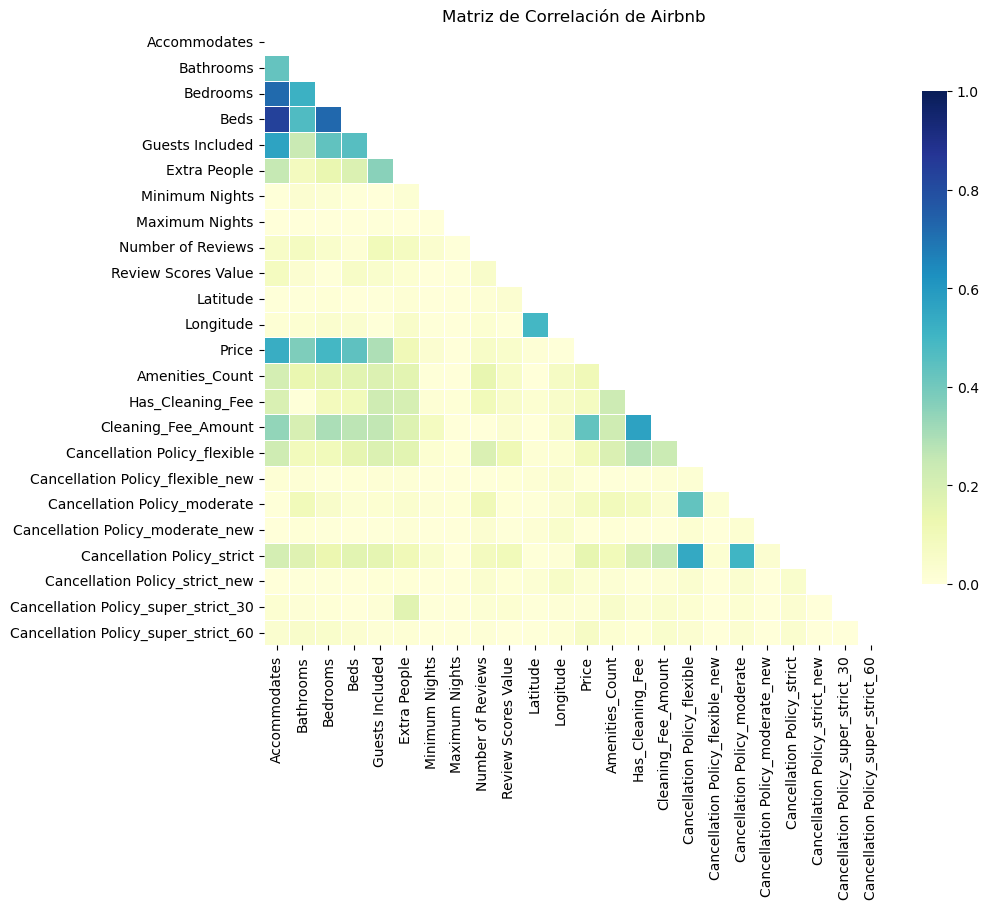

In [107]:
import seaborn as sns

corr = np.abs(airbnb_data.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            annot=False, linewidths=0.5, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.title("Matriz de Correlación de Airbnb")
plt.show()

Vamos a calcular que variables tienen un 10% de correlación con precio

In [108]:
correlation_matrix = airbnb_data.corr()

variables_with_corr = correlation_matrix['Price'][abs(correlation_matrix['Price']) > 0.1].index.tolist()

variables_with_corr.remove('Price')

variables_with_corr

['Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Guests Included',
 'Extra People',
 'Amenities_Count',
 'Cleaning_Fee_Amount',
 'Cancellation Policy_strict']

A continuación vamos a ver que modelo **predice** mejor los precios de Airbnb usando **cv** y **hyperopt**

In [109]:
!pip install xgboost

In [110]:
!pip install hyperopt

In [111]:
import numpy as np
import pandas as pd
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# División de datos
X = airbnb_data[variables_with_corr]
y = airbnb_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Espacio de búsqueda
space = hp.choice('regressors', [
    {
        'model': RandomForestRegressor,
        'params': {
            'n_estimators': hp.choice('rf.n_estimators', range(100, 1001, 100)),
            'max_depth': hp.choice('rf.max_depth', [None] + list(range(5, 31))),
            'min_samples_split': hp.choice('rf.min_samples_split', range(2, 20)),
            'min_samples_leaf': hp.choice('rf.min_samples_leaf', range(1, 20)),
            'bootstrap': hp.choice('rf.bootstrap', [True, False]),
            'max_features': hp.uniform('rf.max_features', 0.3, 0.7)
        }
    },
    {
        'model': KNeighborsRegressor,
        'params': {
            'n_neighbors': hp.choice('knn.n_neighbors', range(1, 21)),
            'weights': hp.choice('knn.weights', ['uniform', 'distance']),
            'algorithm': hp.choice('knn.algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size': hp.choice('knn.leaf_size', range(10, 60, 5)),
            'p': hp.choice('knn.p', [1, 2]),
        }
    },
    {
        'model': XGBRegressor,
        'params': {
            'objective': 'reg:squarederror',
            'max_depth': hp.choice('xgb.max_depth', range(3, 16)),
            'n_estimators': hp.choice('xgb.n_estimators', range(100, 1001, 50)),
            'learning_rate': hp.loguniform('xgb.learning_rate', np.log(0.01), np.log(0.2)),
            'gamma': hp.uniform('xgb.gamma', 0, 5),
            'min_child_weight': hp.choice('xgb.min_child_weight', range(1, 11)),
            'subsample': hp.uniform('xgb.subsample', 0.5, 1),
            'colsample_bytree': hp.uniform('xgb.colsample_bytree', 0.5, 1),
            'reg_lambda': hp.uniform('xgb.reg_lambda', 0, 1),
            'reg_alpha': hp.uniform('xgb.reg_alpha', 0, 1)
        }
    },
    {
        'model': GradientBoostingRegressor,
        'params': {
            'n_estimators': hp.choice('gb.n_estimators', range(100, 1001, 100)),
            'learning_rate': hp.loguniform('gb.learning_rate', np.log(0.01), np.log(0.2)),
            'max_depth': hp.choice('gb.max_depth', range(3, 11)),
            'min_samples_split': hp.choice('gb.min_samples_split', range(2, 10)),
            'min_samples_leaf': hp.choice('gb.min_samples_leaf', range(1, 10)),
            'subsample': hp.uniform('gb.subsample', 0.5, 1.0),
            'max_features': hp.uniform('gb.max_features', 0.3, 1.0)
        }
    },
    {
        'model': Lasso,
        'params': {
            'alpha': hp.loguniform('lasso.alpha', np.log(0.001), np.log(10)),
            'max_iter': hp.choice('lasso.max_iter', [1000, 2000, 5000]),
            'tol': hp.uniform('lasso.tol', 1e-4, 1e-2)
        }
    },
    {
        'model': LinearRegression,
        'params': {}
    }
])

# Función objetivo
def objective(params):
    Model = params['model']
    model_params = params['params']
    model = Model(**model_params)

    # Escalado si es necesario
    if Model in [Lasso, KNeighborsRegressor, LinearRegression]:
        model = make_pipeline(StandardScaler(), model)

    scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    return {'loss': -scores.mean(), 'status': STATUS_OK}

# Búsqueda con Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Entrenar mejor modelo
best_space = space_eval(space, best)
best_model = best_space['model']
best_params = best_space['params']

final_model = best_model(**best_params)
if best_model in [Lasso, KNeighborsRegressor, LinearRegression]:
    final_model = make_pipeline(StandardScaler(), final_model)

final_model.fit(X_train, y_train)

# Evaluar
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {best_model.__name__}")
print(f"Mejores parámetros: {best_params}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


100%|███████████████████████████████████████████████| 100/100 [06:46<00:00,  4.07s/trial, best loss: 45.92769342067327]
Mejor modelo: GradientBoostingRegressor
Mejores parámetros: {'learning_rate': 0.029728743214846233, 'max_depth': 7, 'max_features': 0.35056633260409836, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200, 'subsample': 0.9532844091893731}
RMSE: 45.103769049377284
MAE: 22.79597749864553
R2: 0.5920855722901435


Después de los **resultados** obtenidos, comparando los modelos el que parece tener mejor desempeño es **GradientBoostingRegressor**

## TEST

Vamos a probar con test el mejor modelo que tenemos entrenado.
Voy a cargar el df de Test que tenemos guardado y aseguir los mismos pasos que con el modelo de Train.

In [116]:
airbnb_data_test = pd.read_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract_test.csv', decimal = ".", sep = ";")


In [117]:
airbnb_data_test = pd.read_csv('C:/Users/javil/OneDrive/Escritorio/KEEPCODING/Machine-Learning-101/Practica/airbnb-listings-extract_test.csv', decimal = ".", sep = ";")
# Elimino columnas innecesarias de test

columnas_relevantes = [
    'Accommodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Guests Included',
    'Extra People',
    'Amenities',
    'Minimum Nights',
    'Maximum Nights',
    'Number of Reviews',
    'Cleaning Fee',
    'Review Scores Value',
    'Cancellation Policy',
    'Latitude',
    'Longitude',
    'Price'
]

airbnb_data_test = airbnb_data[columnas_relevantes]

In [118]:
# Luego realiza la limpieza de los datos:
airbnb_data_test["Amenities_Count"] = airbnb_data_test['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
airbnb_data_test = airbnb_data_test.drop(['Amenities'], axis=1, errors='ignore')

# Rellenamos los nulos con la moda
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data_test[column].mode()[0]
    airbnb_data_test[column].fillna(mode_value, inplace=True)
    
# Aplicamos el mismo método que seguimos con Cleaning Fee
airbnb_data_test['Has_Cleaning_Fee'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)
airbnb_data_test['Cleaning_Fee_Amount'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)
airbnb_data_test = airbnb_data_test.drop(['Cleaning Fee'], axis=1)

# OneHotEncoder para las variables categoricas
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_values = encoder.fit_transform(airbnb_data_test[['Cancellation Policy']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))
airbnb_data_test = pd.concat([airbnb_data_test, encoded_df], axis=1)
airbnb_data_test = airbnb_data_test.drop(['Cancellation Policy'], axis=1)

# Nos cargamos las filas nulas de Price
airbnb_data_test = airbnb_data_test.dropna(subset=['Price'])

# Preparo los datos
data_test = airbnb_data_test.values
y_test = data_test[:, 6]      
X_test = np.delete(data_test, 6, axis=1)  



Ahora que tenemos el df de test como el de train tras las rtansformaciones, vamos a intentar predecir el precio

In [119]:
X_test_real = airbnb_data_test[variables_with_corr]
y_test_real = airbnb_data_test['Price']

y_pred_test = final_model.predict(X_test_real)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test_real, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_real, y_pred_test)
r2_test = r2_score(y_test_real, y_pred_test)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R2: {r2_test:.2f}")

Test RMSE: 39.67
Test MAE: 20.90
Test R2: 0.69


## CONCLUSIÓN

Llegó el momento de ver con los **resultados** que hemos obtenido como ha sido el desempeño del modelo.

| Métrica |             Train          |           Test        |
|---------|----------------------------|-----------------------|
| RMSE    | 45.10                      | 39.67                 |
| MAE     | 22.79                      | 20.90                 |
| R²      | 0.59                       | 0.69                  |

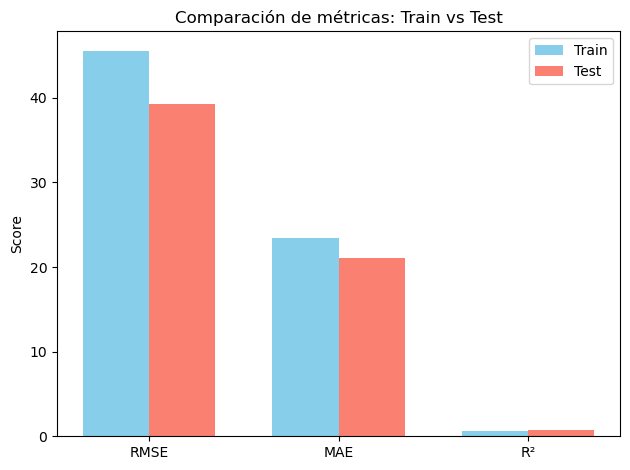

In [120]:
import matplotlib.pyplot as plt

# Métricas para comparar
labels = ['RMSE', 'MAE', 'R²']
train_scores = [45.57, 23.38, 0.58]
test_scores = [39.21, 21.01, 0.70]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], train_scores, width, label='Train', color='skyblue')
ax.bar([i + width/2 for i in x], test_scores, width, label='Test', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Comparación de métricas: Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

En esta comparación entre **Train** y **Test** podemos ver la diferencia entre las métricas **RMSE, MAE y R2**.
No veo que haya señales claras de overfitting ni undefitting por lo que pienso que puede estar bien ajustado.
**RMSE** y **MAE** me hace preguntarme porque tiene menor valor en Test pero en **R2** veo que puede haber una buena generalización.

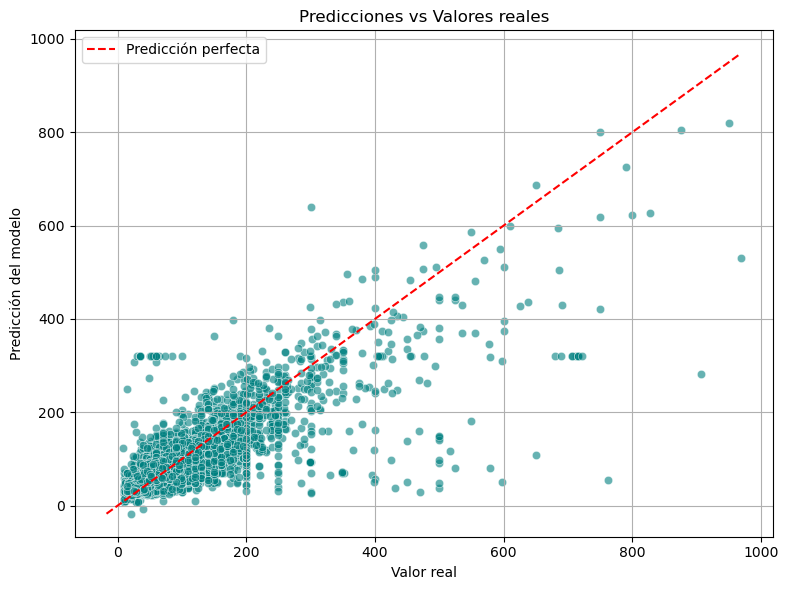

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_real, y=y_pred_test, alpha=0.6, color='teal')

# Línea ideal de predicción perfecta
max_val = max(max(y_test_real), max(y_pred_test))
min_val = min(min(y_test_real), min(y_pred_test))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label='Predicción perfecta')

plt.xlabel('Valor real')
plt.ylabel('Predicción del modelo')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Aquí podemos ver la relación entre **valores reales** y la **predicción del precio** generada por **Gradient Boosting Regressor**.
La **línea roja** representa la predicción ideal de donde deben coincidir lso valores.
Veo que la concentración alrededor de la línea roja es bastante buena, por lo que creo que el **rendimiento** del modelo es **aceptable**.
Sin embargo en los rangos de **precio mas altos** hay una **mayor dispersión**, cosa que me hace pensar que el modelo tiene mas dificultades para predecir en esos rangos por la falta de datos.
